
# Predictive Analysis : Prediksi Harga Tiket Pesawat

## Persiapan dan *Load Data*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Stuff/Dicoding/ML_Terapan/Clean_Dataset.csv', delimiter=",", index_col=0)
dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Proses *load* dataset pemesanan tiket pesawat yang didapatkan dari https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction.

Dataset yang didapatkan terdapat 300153 sampel data, dengan 11 kolom data yaitu : airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, dan price.

## Visualisasi Data dan *Exploratory Data Analysis*

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


Variabel pada dataset :
- airline : Nama maskapai
- flight : Nomor penerbangan
- source_city : Kota asal penerbangan
- departure_time : Waktu keberangkatan
- stops : Jumlah pemberhentian
- arrival_time : Waktu tiba
- destination_city : Kota tujuan penerbangan
- class : Kelas penerbangan
- duration : Durasi penerbangan
- days_left : Selang waktu antara pembelian tiket dengan waktu penerbangan
- price : harga tiket penerbangan

Dataset ini jenis variabel sebagai berikut :
- 8 kolom berupa objek yaitu : airline, flight, source_city, departure_time, stops, arrival_time, destination_city, dan class
- 1 kolom berupa float64 yaitu duration
- 2 kolom berupa int64 yaitu days_left dan price.
Kolom price merupakan target fitur yang akan diprediksi

In [ ]:
dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom yang memiliki data numerik, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Pembersihan Data

#### Data Duplikat

Tidak ditemukan data duplikat pada dataset

In [ ]:
dataset.duplicated().sum()

0

#### *Missing Value*

Tidak ditemukan data yang hilang pada dataset

In [ ]:
dataset.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### Data Outlier

Data outlier merupakan sampel data yang nilainya berbeda secara signifikan dibandingkan terhadap nilai-nilai data lainnya. Terdapat beberapa metode untuk menangani outlier, yang dimana pada kasus ini akan digunakan metode IQR (Interquartile Range)

Outlier akan dapat ditunjukan dengan memanfaatkan visualisasi berupa boxplot



In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='duration'>

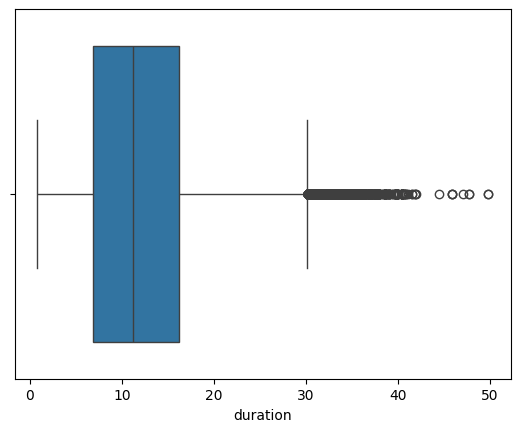

In [ ]:
sns.boxplot(x=dataset['duration'])

<Axes: xlabel='days_left'>

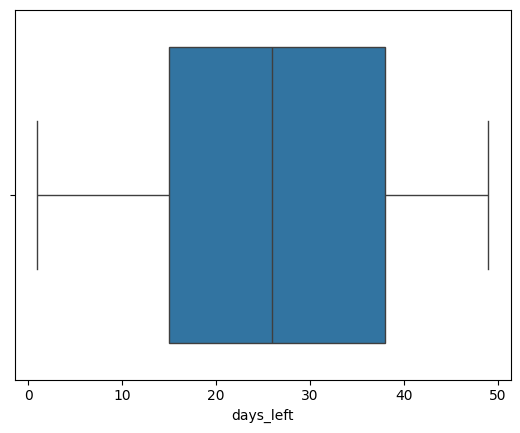

In [ ]:
sns.boxplot(x=dataset['days_left'])

In [31]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah drop
dataset.shape

<ipython-input-31-d3014e8af4ec>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-31-d3014e8af4ec>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-31-d3014e8af4ec>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(297920, 11)

Setelah visualisasikan menggunakan boxplot, terlihat terdapat beberapa sampel data yang berupa outlier. Setelah menghilangkan data yang memiliki outlier, dataset memiliki 297920 sampel data.

### Analisis Data

Proses analisis data akan dilakukan menggunakan teknik *univariate data analysis* dan teknik *multivariate data analysis*.

#### Univariate Data Analysis

Teknik *univariate data analysis* merupakan analisis data yang berfokus pada satu variabel pada satu waktu. Teknik ini dilakukan untuk mengetahui distribusi dan frekuensi data dari suatu dataset.

Pertama-tama, dipisahkan terlebih dahulu antara fitur berupa kategori dengan numerik.

In [49]:
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
numerical_features = ['duration', 'days_left']

a. Fitur Kategori

           jumlah sampel  persentase
Vistara           126917        42.6
Air_India          79601        26.7
Indigo             43120        14.5
GO_FIRST           23173         7.8
AirAsia            16098         5.4
SpiceJet            9011         3.0


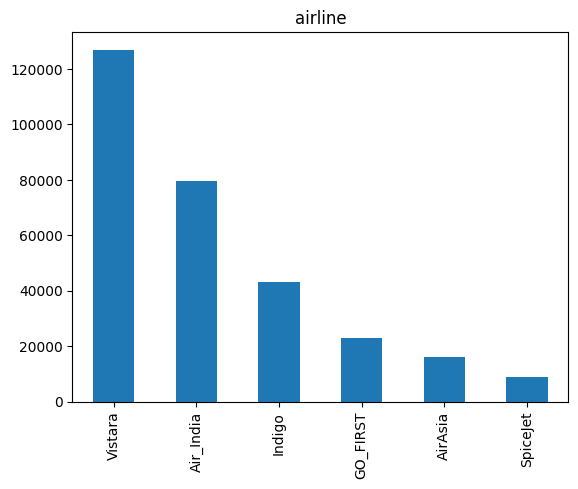

In [ ]:
feature = categorical_features[0]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

         jumlah sampel  persentase
UK-706            3235         1.1
UK-772            2741         0.9
UK-720            2650         0.9
UK-836            2542         0.8
UK-822            2468         0.8
...                ...         ...
SG-9923              1         0.0
6E-6474              1         0.0
6E-865               1         0.0
G8-705               1         0.0
G8-107               1         0.0

[1561 rows x 2 columns]


<Axes: title={'center': '20 Nomor Penerbangan Terbanyak'}>

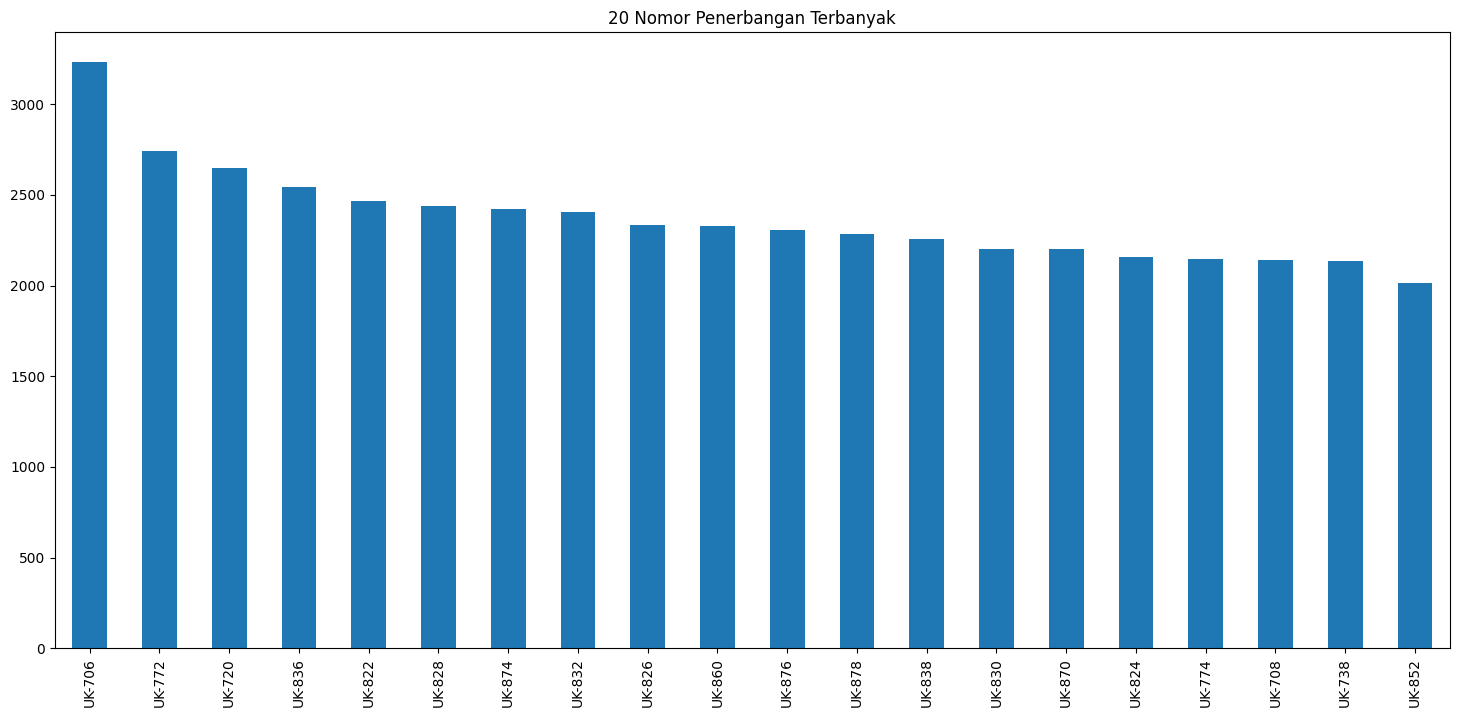

In [113]:
import matplotlib.pyplot as plt

feature = categorical_features[1]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count_plt = count.head(20)
count_plt.plot(kind='bar', title="20 Nomor Penerbangan Terbanyak" , figsize = (18,8))

           jumlah sampel  persentase
Delhi              61156        20.5
Mumbai             60683        20.4
Bangalore          51548        17.3
Kolkata            45841        15.4
Hyderabad          40636        13.6
Chennai            38056        12.8


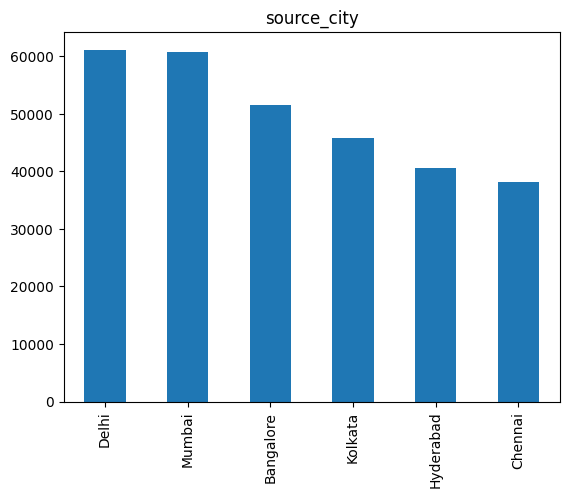

In [ ]:
feature = categorical_features[2]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Morning                70372        23.6
Early_Morning          66189        22.2
Evening                64955        21.8
Night                  47998        16.1
Afternoon              47100        15.8
Late_Night              1306         0.4


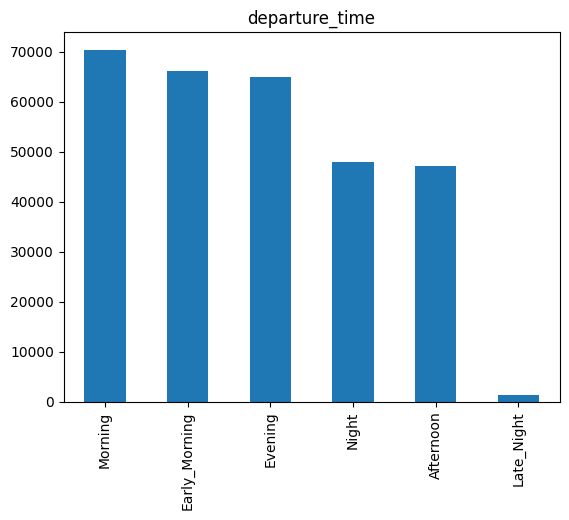

In [ ]:
feature = categorical_features[3]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
one                 249478        83.7
zero                 36004        12.1
two_or_more          12438         4.2


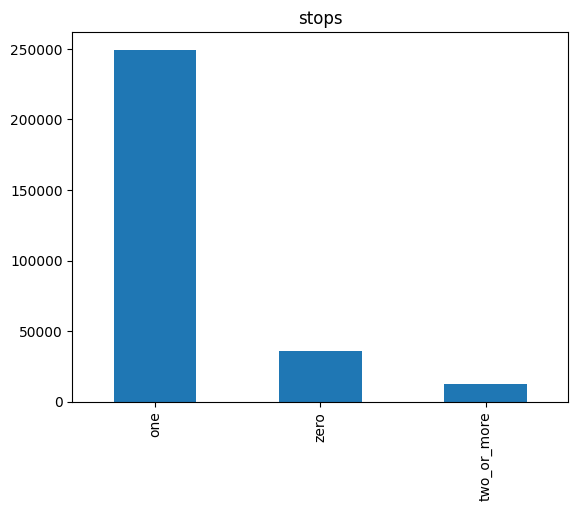

In [ ]:
feature = categorical_features[4]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Night                  91538        30.5
Evening                78323        26.1
Morning                62735        20.9
Afternoon              38139        12.7
Early_Morning          15417         5.1
Late_Night             14001         4.7


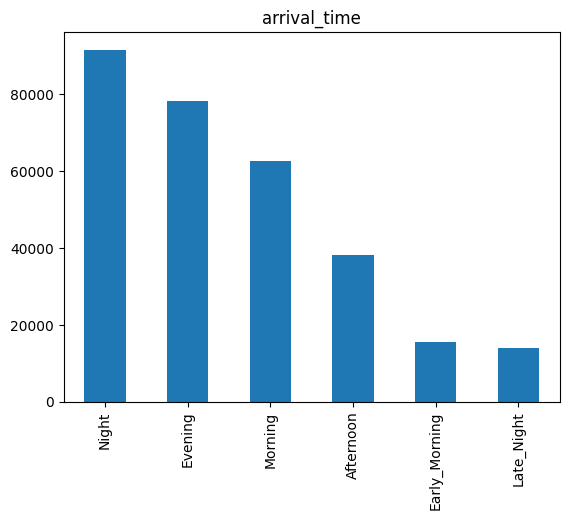

In [ ]:
feature = categorical_features[5]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Mumbai             59097        19.7
Delhi              57360        19.1
Bangalore          51068        17.0
Kolkata            49534        16.5
Hyderabad          42726        14.2
Chennai            40368        13.4


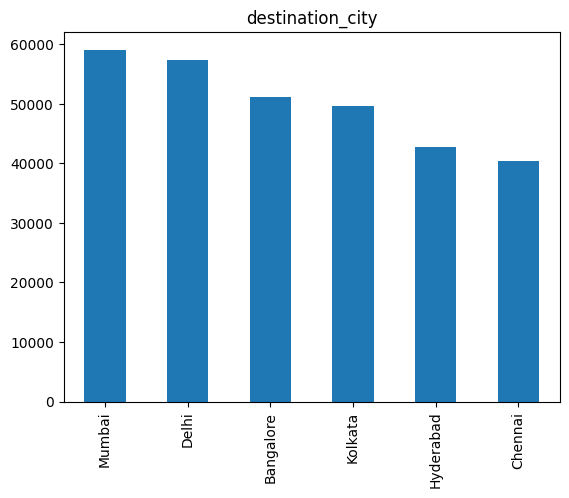

In [ ]:
feature = categorical_features[6]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

          jumlah sampel  persentase
Economy          206666        68.9
Business          93487        31.1


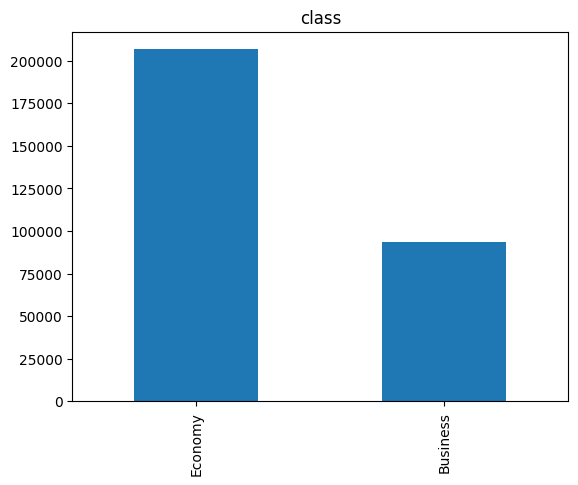

In [ ]:
feature = categorical_features[7]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari plot grafik jumlah data terhadap kategori, dapat diketahui bahwa :

- Dari 6 kategori airline dapat ditunjukan maskapai paling banyak pada dataset adalah maskapai Vistara dengan 42.6%.

- Terdapat 1561 nomor penerbangan berbeda yang terdata pada dataset. Data menunjukan bahwa penerbangan kode maskapai UK memiliki jumlah penerbangan paling banyak, dengan nomer penerbangan UK-706 memiliki 3116 penerbangan. Dataset ini memiliki jumlah kategori yang sangat banyak dibandingkan kategori lainnya dengan distribusi yang tidak merata. Beberapa kategori hanya memiliki 1 sampel.

- Dari ke enam kota asal penerbangan, mayoritas penerbangan berasal dari kota Delhi dan Mumbai.

- Dari 6 rentang waktu keberangkatan penerbangan, jumlah penerbangan paling banyak terjadi pada waktu pagi hari.

- Dari jumlah pemberhentian, mayoritas penerbangan akan melakukan satu pemberhentian.

- Waktu tiba penerbangan mayoritas pada waktu sore hingga malam.

- Kota tujuan penerbangan mayoritas bertuju ke kota Mumbai dan Delhi.

- Mayoritas sebanyak 68.9 % merupakan tiket yang dipesan merupakan tiket kelas ekonomi

b. Fitur Numerik

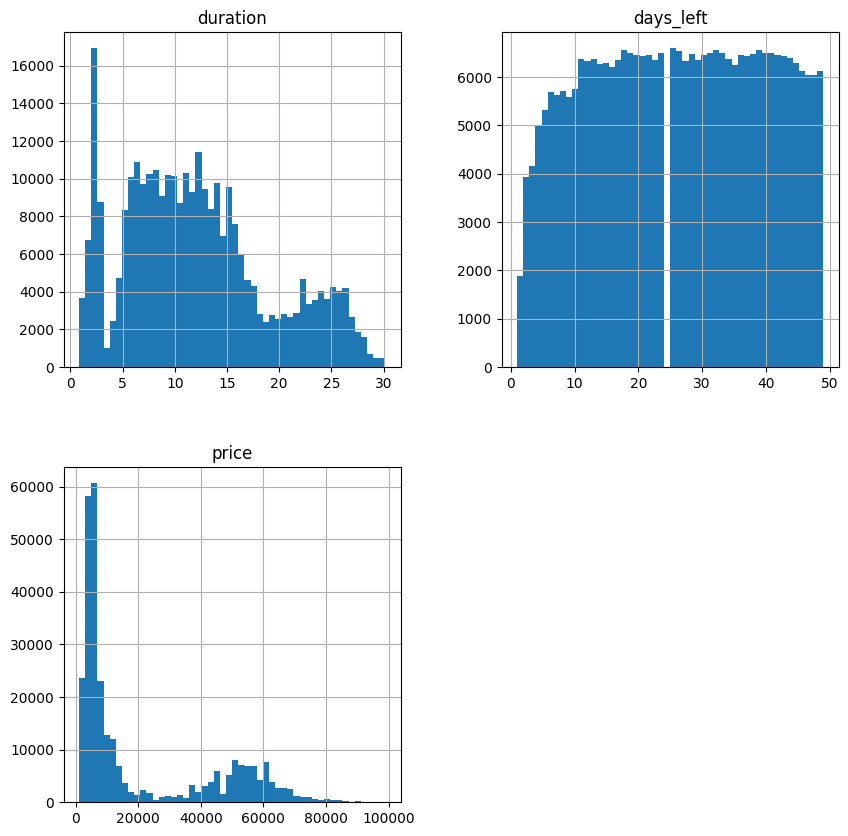

In [61]:
dataset.hist(bins=50, figsize=(10,10))
plt.show()

Dari histogram fitur numerik dataset terutama pada fitur 'price', dapat diketahui bahwa :  
- Peningkatan harga tiket pesawat berhubungan dengan penurunan jumlah sampel.   
- Sampel data tiket pesawat mayoritas berada pada harga dibawah 15000.
- Distribusi data cenderung miring ke kanan (right-skewed) dengan distribusi yang tidak simetris. Hal ini akan berimplikasi pada model

#### Multivariate Analysis

Teknik *multivariate data analysis* merupakan analisis data yang melibatkan beberapa variabel pada satu waktu. Teknik ini dilakukan untuk mengetahui hubungan dan pola antara satu variabel dengan variabel lainnya.


a. Fitur Kategori

<ipython-input-53-8a1c8a378a97>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
<ipython-input-53-8a1c8a378a97>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
<ipython-input-53-8a1c8a378a97>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
<ipython-i

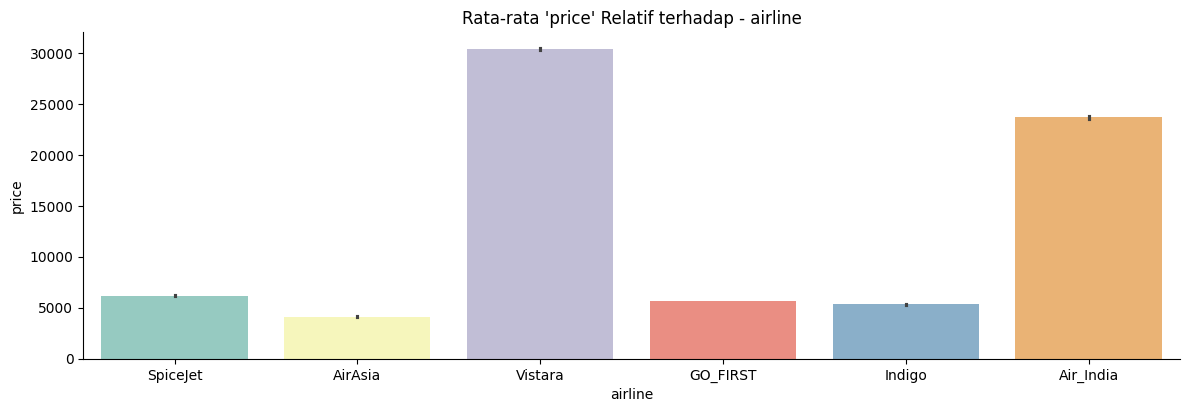

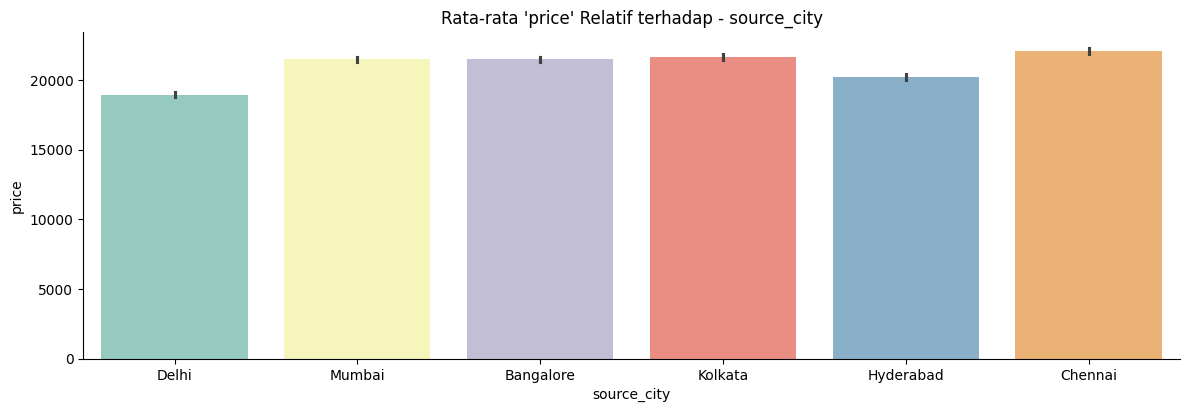

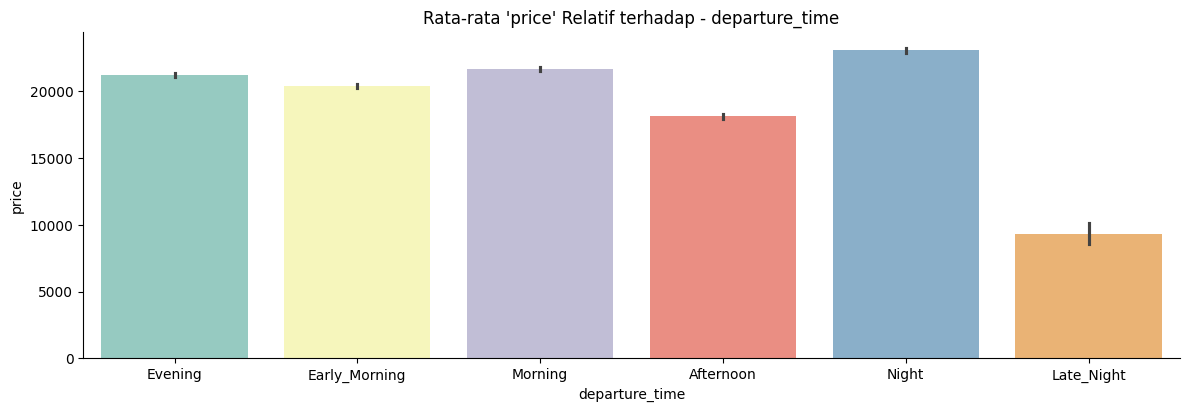

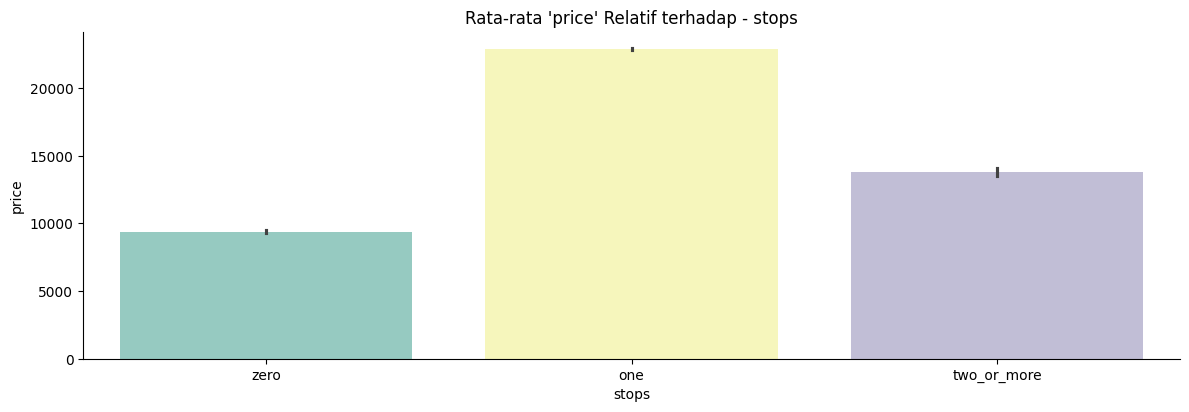

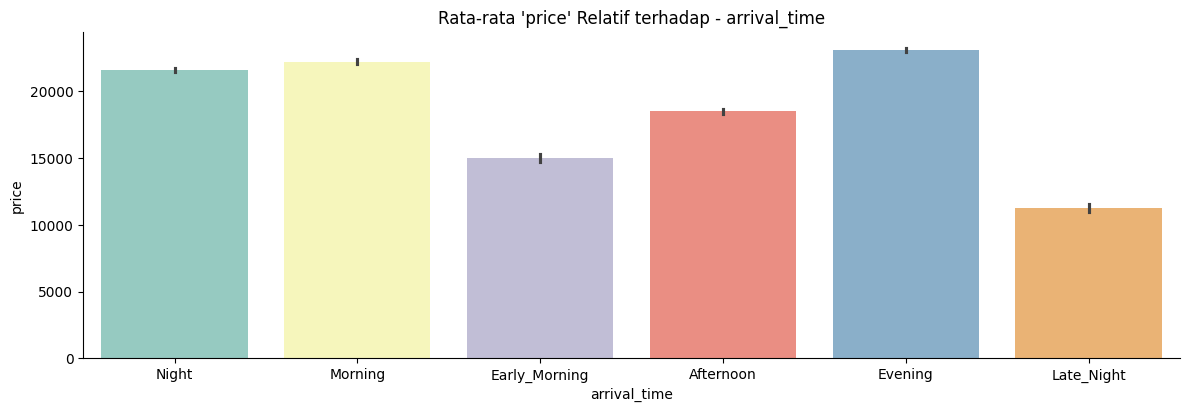

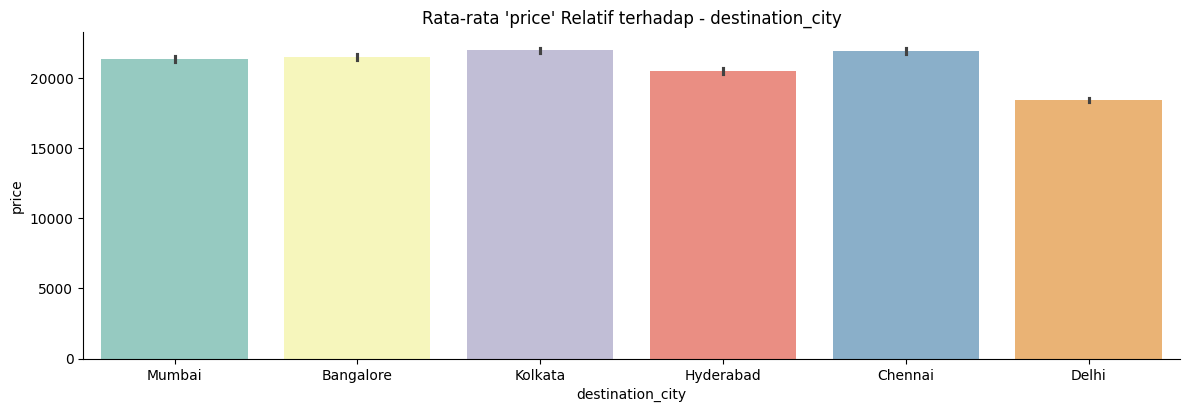

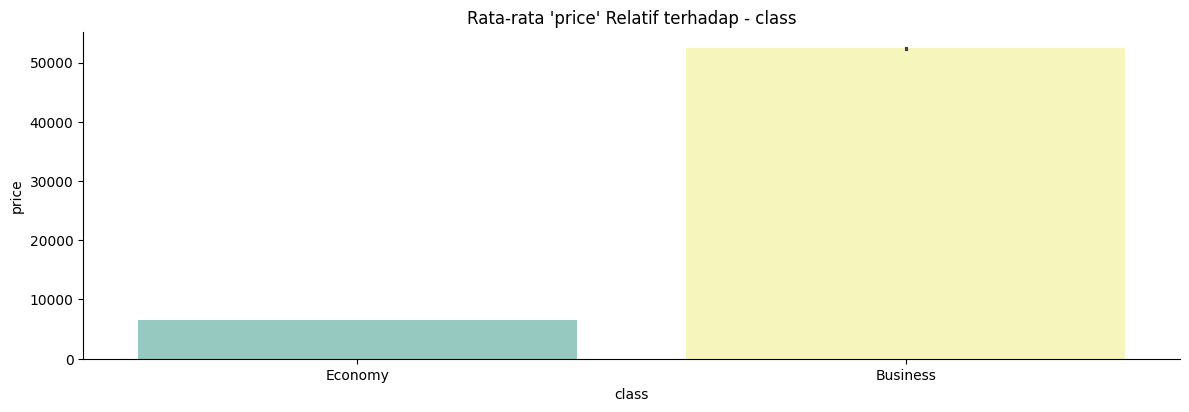

In [53]:
cat_features = dataset.select_dtypes(include='object').columns.to_list()
cat_features.remove('flight')
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

<ipython-input-112-e9afbf4a21c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='flight', y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=count_plt, palette="Set3")


Text(0.5, 1.0, "Rata-rata 'price' Relatif terhadap - flight (10 Penerbangan Terbanyak)")

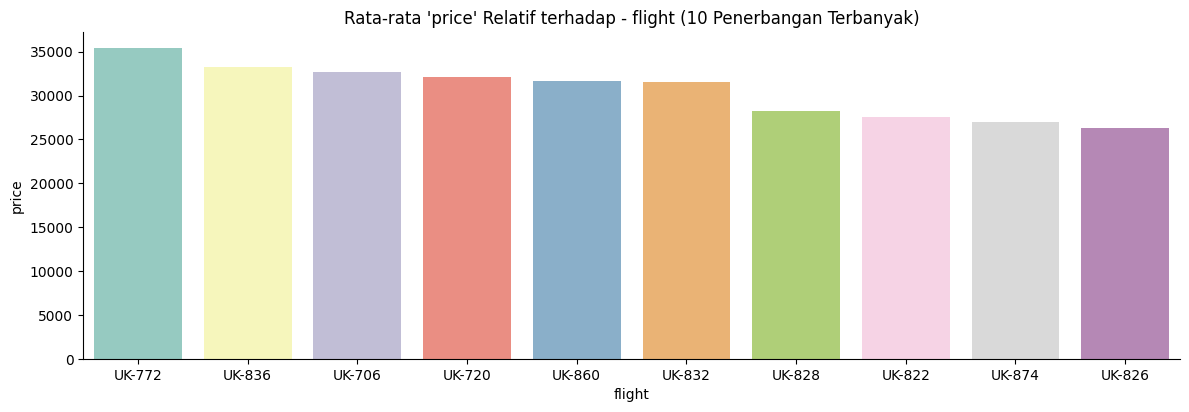

In [112]:
flight_counts = dataset['flight'].value_counts()
df_top_10 = dataset[dataset['flight'].isin(flight_counts.head(10).index)]
avg_prices = df_top_10.groupby('flight')['price'].mean().reset_index()
count_plt = avg_prices.sort_values(by='price', ascending=False).head(10)
sns.catplot(x='flight', y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=count_plt, palette="Set3")
plt.title("Rata-rata 'price' Relatif terhadap - flight (10 Penerbangan Terbanyak)")

Hasil pengamatan pada nilai rata-rata 'price' terhadap fitur kategori dapat
diketahui informasi sebagai berikut :
- Dari fitur 'airline', terlihat bahwa maskapai Vistara dan Air India memiliki rata-rata harga tiket yang lebih tinggi dibandingkan dengan maskapai lainnya. Hal ini menandakan kategori ini memiliki pengaruh terhadap harga
- Dari fitur 'source_city', rata-rata harga tiket berada di sekitar harga 20000. Hal ini menandakan kategori ini memiliki pengaruh yang rendah terhadap harga.
- Dari fitur 'departure_time', waktu 'late_night' memiliki rata-rata harga yang lebih rendah dibandingkan waktu lainnya.
- Dari fitur 'stops', terlihat bahwa jumlah pemberhentian memiliki rata-rata nilai yang berbeda satu sama lainnya. 'one' atau satu pemberhentian memiliki rata-rata harga tertinggi.
- Dari fitur 'arrival time', 3 waktu memiliki rata-rata nilai diatas harga 20000 dengan 3 waktu lainnya berada dibawah 20000. 'late_night' menjadi waktu tiba dengan nilai rata-rata terendah.
- Dari fitur 'destination_city', rata-rata harga tiket berada di sekitar rentang 20000. Hal ini menandakan kategori ini memiliki pengaruh yang rendah terhadap harga.
- Dari fitur 'class', terlihat bahwa harga rata-rata dari kelas ekonomi dan bisnis memiliki perbedaan yang sangat berbeda. Hal ini menandakan kategori ini sangat berpengaruh terhadap harga.
- Dari fitur 'flight', karena jumlah kategori yang sangat banyak, maka hanya dapat ditampilkan 10 penerbangan yang terbanyak. Nilai rata-rata 'price' menurun seiring jumlah penerbangan.

Terlihat dari hasil pengamatan bahwa fitur kategori memiliki pengaruh terhadap target label 'price'

b. Fitur Numerik

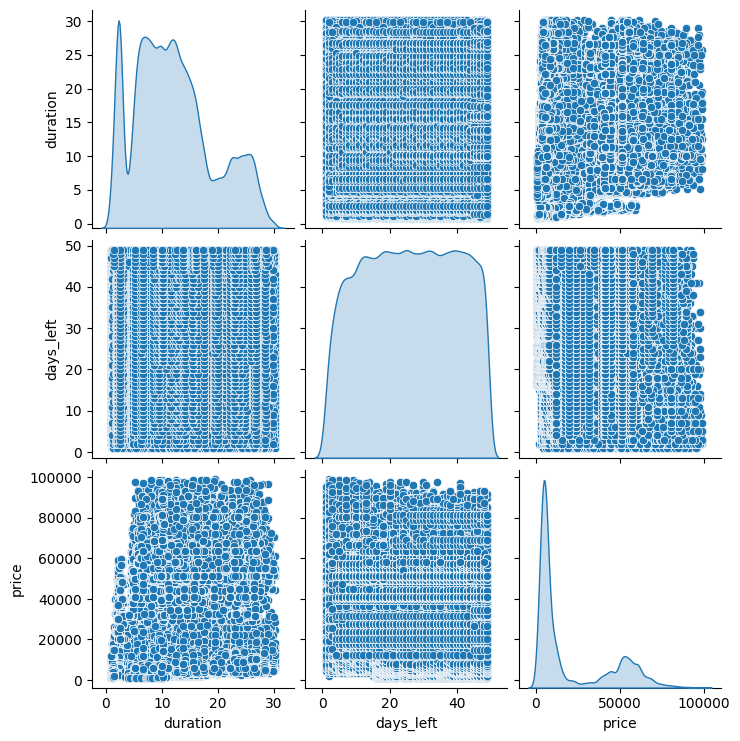

In [62]:
sns.pairplot(dataset, diag_kind = 'kde')

Hasil pengamatan pada nilai 'price' terhadap fitur numerik dapat
diketahui menggunakan fungsi pairplot(). Pada grafik, hubungan antara 'price' dengan fitur numerik lainnya tidak membentuk pola yang jelas, menandakan korelasi yang lemah.

Korelasi dapat dievaluasi menggunakan koefisien korelasi. Nilai koefisien ini adalah dari -1 hingga 1. Nilai koefisien ini digunakan untuk mengetahui hubungan antar dua variabel, dimana nilai -1 atau 1 menandakan korelasi yang kuat, sedangkan nilai 0 menandakan tidak ada nya korelasi sama sekali. Evaluasi koefisien korelasi dapat dilakukan dengan menggunakan corr().

<ipython-input-63-faf7b5d09b74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

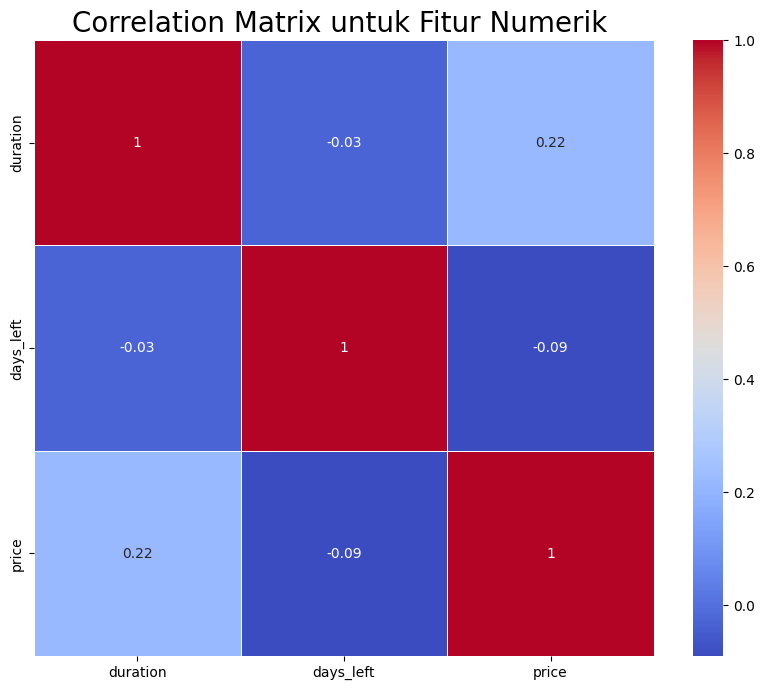

In [63]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari tabel matriks korelasi, dapat terlihat bahwa fitur 'duration' dan 'days_left' memiliki nilai koefisien yang rendah, yaitu 0.22 dan -0.09. Hal ini menunjukan korelasi yang lemah antara dua variabel tersebut terhadap nilai 'price'. Fitur 'days_left' memiliki nilai korelasi yang sangat kecil yang dapat diasumsikan tidak memiliki hubungan terhadap 'price'

Dari fitur kategori, terdapat fitur 'source_city' dan 'destination_city' yang memiliki pengaruh rendah terhadap nilai 'price'. Fitur numerik 'duration' dan 'days_left' memiliki koefisien korelasi yang kecil terhadap nilai 'price'. Walau fitur-fitur ini memiliki korelasi yang lemah, namun fitur ini akan dipertahankan dikarenakan masih memiliki korelasi terhadap nilai 'price'.

Fitur 'airline' memiliki jumlah kategori yang sangat banyak yang tidak efisien untuk diproses model. Maka fitur 'airline' akan di-drop dari dataset.





In [32]:
dataset.drop(['flight'], inplace=True, axis=1)
dataset

<ipython-input-32-1ff2dae89544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['flight'], inplace=True, axis=1)


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## *Data Preparation*

Preparasi data merupakan tahapan yang dilakukan untuk mempersiapkan dataset sebelum dimasukan ke proses pemodelan. Tahapan ini melakukan transformasi pada data agar memiliki bentuk yang cocok ketika dimodelkan nanti. Proses preparasi data yang dilakukan pada bagian ini yaitu :
- Encoding fitur kategori
- Pembagian dataset
- Standarisasi

### Encoding

Proses *encoding* adalah proses mengubah data dari satu bentuk menjadi bentuk lainnya. Proses ini dilakukan untuk mengubah data fitur kategori yang masih berbentuk text menjadi data numerik yang dapat diproses pada pelatihan nantinya.

Salah satu metode *encoding* adalah menggunakan metode *label encoding*. Metode ini merubah setiap nilai kategori menjadi nilai numerik yang unik. Contohnya adalah merubah fitur kategori 'departure_time', seperti 'morning' menjadi 1, 'afternoon' menjadi 2, dan seterusnya. Proses ini dilakukan menggunakan LabelEncoder() dari pustaka scikit-learn.

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['airline']=le.fit_transform(dataset['airline']);
dataset['source_city']=le.fit_transform(dataset['source_city']);
dataset['destination_city']=le.fit_transform(dataset['destination_city']);
dataset['departure_time']=le.fit_transform(dataset['departure_time']);
dataset['arrival_time']=le.fit_transform(dataset['arrival_time']);
dataset['stops']= dataset["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int);
dataset['class']= dataset["class"].replace({'Economy':0,'Business':1}).astype(int);

dataset.head()

<ipython-input-33-e0d39e21fc0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['airline']=le.fit_transform(dataset['airline']);
<ipython-input-33-e0d39e21fc0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['source_city']=le.fit_transform(dataset['source_city']);
<ipython-input-33-e0d39e21fc0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,0,2.17,1,5953
1,4,2,1,0,4,5,0,2.33,1,5953
2,0,2,1,0,1,5,0,2.17,1,5956
3,5,2,4,0,0,5,0,2.25,1,5955
4,5,2,4,0,4,5,0,2.33,1,5955


### Pembagian Dataset

Pembagian dataset dilakukan untuk membagi dataset menjadi data latih (*training*) dan data uji (*test*). Proses ini dilakukan untuk menyimpan sebagian data untuk menguji model selain dari data yang digunakan ketika pelatihan.

Pada kasus ini, pembagian dataset dilakukan dengan proporsi 90 % data pelatihan dan 10 % data uji.

In [34]:
from sklearn.model_selection import train_test_split
X = dataset.drop(["price"],axis =1)
y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 297920
Total # of sample in train dataset: 268128
Total # of sample in test dataset: 29792


### Standarisasi

Proses standarisasi merupakan tahapan yang dilakukan untuk menyeragamkan nilai-nilai pada fitur. Beberapa algoritma *machine learning* seperti regresi linear sangat sensitf terhadap perbedaan skala pada dataset. Proses ini juga akan membuat pemodelan algoritma lebih cepat serta meningkatkan kinerja model.

Proses standarisasi yang digunakan adalah StandardScaler. Teknik ini mamastikan dataset dapat seragam dengan mengubah nilai variabel pada dataset agar memiliki rata-rata (mean) senilai nol dan standar deviasi senilai satu. Hal ini dilakukan dengan cara menghitung mean dan standar deviasi dari setiap fitur, kemudian nilai setiap fitur akan dikurangi dengan mean fitur dan dibagi oleh standar deviasi fitur.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(scaler, columns=X_train.columns)

X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.487911,1.381144,0.900858,0.200587,1.103994,0.809002,-0.674071,0.097180,-1.773628
1,0.487911,-0.331413,-0.240005,0.200587,-1.191560,-0.910970,-0.674071,0.025687,-1.330960
2,-1.696361,-0.331413,-0.240005,0.200587,-1.191560,1.382326,-0.674071,0.025687,1.103712
3,-1.150293,-0.902266,0.900858,0.200587,-1.765449,0.809002,1.483523,2.074686,-0.150513
4,-1.150293,-1.473118,0.900858,0.200587,1.103994,0.235678,-0.674071,0.001379,-1.847406
...,...,...,...,...,...,...,...,...,...
268123,1.033979,-0.902266,-1.380868,0.200587,-0.617672,-1.484294,-0.674071,-0.975220,-1.552294
268124,1.033979,-0.331413,-0.240005,0.200587,-0.617672,-1.484294,-0.674071,1.967446,0.956156
268125,-1.150293,-0.331413,1.471289,-2.330736,1.103994,0.809002,-0.674071,-1.428488,1.472602
268126,-1.150293,0.239439,-1.380868,0.200587,1.103994,1.382326,1.483523,-0.664939,1.398824


In [39]:
X_train.describe().round(4)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,268128.0000,268128.0000,268128.0000,268128.0000,268128.0000,268128.0000,268128.0000,268128.0000,268128.0000
mean,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.6964,-1.4731,-1.3809,-2.3307,-1.7654,-1.4843,-0.6741,-1.6072,-1.8474
25%,-1.1503,-0.9023,-0.8104,0.2006,-0.6177,-0.9110,-0.6741,-0.7607,-0.8145
50%,-0.0582,-0.3314,-0.2400,0.2006,0.5301,0.2357,-0.6741,-0.1287,-0.0030
75%,1.0340,0.8103,0.9009,0.2006,1.1040,0.8090,1.4835,0.5619,0.8824
max,1.0340,1.3811,1.4713,2.7319,1.1040,1.3823,1.4835,2.5880,1.6939


Dari deskripsi dataset menunjukan bahwa dataset memiliki mean bernilai nol dan standar deviasi seharga satu.

## *Modelling*

Tahapan ini adalah pembuatan model *machine learning*. Untuk memprediksi harga tiket pesawat, model yang digunakan pada proyek ini adalah model regresi. Algoritma yang digunakan adalah sebagai berikut :
- K-Nearest Neighbor (KNN)
- Random Forest
- Adaptive Boosting
- Extreme Gradient Boosting (XGBoost)


Pertama, membuat dataframe yang akan menyimpan data mengenai pelatihan model

In [40]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'XGBoost'])

### K-Nearest Neighbor

Algoritma KNN merupakan algoritma sederhana yang memprediksi nilai dengan cara membandingkan data prediksi terhadap data latihnya. Hal ini dilakukan membandingkan jarak satu sampel ke sampel lainnya dengan memilih sejumlah tetangga terdekat.

Pemilihan nilai k untuk model ini adalah sebesar 50

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

Algoritma *random forest* adalah algoritma *supervised learning* yang dapat menyelesaikan kasus klasifikasi atau regresi. Model ini dapat memprediksi nilai dengan kumpulan algoritma *decision tree* yang berbentuk esembel.

Parameter yang digunakan adalah :
- n_estimators = 100
- max_depth = 25
- random_state = 123
- n_jobs = -1 (paralel)

In [42]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=123, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Adaptive Boosting

Algoritma ini merupakan model ensembel menggunakan serangkaian model dengan prediksi yang lemah dan menggabungkan prediksi model-model tersebut menjadi prediksi yang lebih akurat.


In [43]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=123)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

### Extreme Gradient Boosting (XGBoost)

Algoritma XGBoost adalah model ensembel menggunakan metode *gradient boosting* untuk mendapatkan hasil prediksi akhir. Algoritma ini merupakan pendekatan yang cukup populer dalam penyelesaian kasus klasifikasi ataupun regresi.

In [44]:
!pip install xgboost

In [45]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
models.loc['train_mse', 'XGBoost'] = mean_squared_error(y_pred=xgb.predict(X_train), y_true=y_train)

## Evaluasi

Seluruh model yang telah dilatih akan dievaluasi performanya menggunakan beberapa metrik pengukuran. Metrik yang digunakan untuk mengevaluasi model adalah sebagai berikut :
- Mean Squared Error
- $R^2$
- Mean Absolute Percentage Error


Hal pertama yang dilakukan adalah melakukan standarisasi pada data uji dan menghitung metrik evaluasi dari setiap model.

In [46]:
scaler = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(scaler, columns=X_test.columns)

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_percentage_error

mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
r2 = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
mape = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'XGBoost' : xgb}

for name, model in model_dict.items():
    y_trainpred = model.predict(X_train)
    y_testpred = model.predict(X_test)
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=y_trainpred)/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=y_testpred)/1e3
    r2.loc[name, 'train'] = r2_score(y_true=y_train, y_pred=y_trainpred)
    r2.loc[name, 'test'] =r2_score(y_true=y_test, y_pred=y_testpred)
    mape.loc[name, 'train'] = mean_absolute_percentage_error(y_true=y_train, y_pred=y_trainpred)
    mape.loc[name, 'test'] = mean_absolute_percentage_error(y_true=y_test, y_pred=y_testpred)

Hasil perhitungan metrik yang dilakukan kemudian diplot menjadi grafik agar memudahkan pembacaan.

,train,test
KNN,17105.223068,17522.916402
RF,1419.855235,7067.600448
Boosting,32828.981482,33057.717608
XGBoost,11293.073834,733248.0019


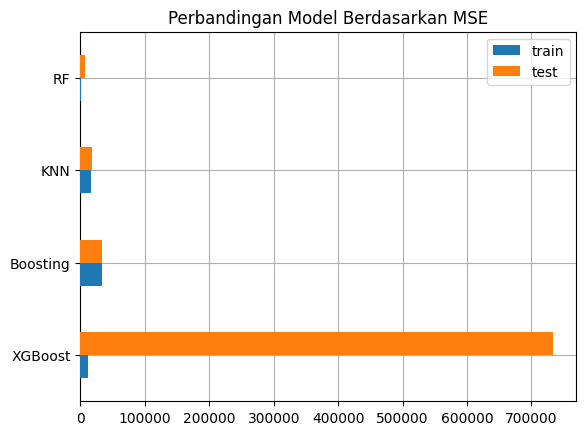

In [51]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title('Perbandingan Model Berdasarkan MSE')

mse

,train,test
KNN,0.966691,0.966204
RF,0.997235,0.986369
Boosting,0.936071,0.936243
XGBoost,0.978009,-0.414182


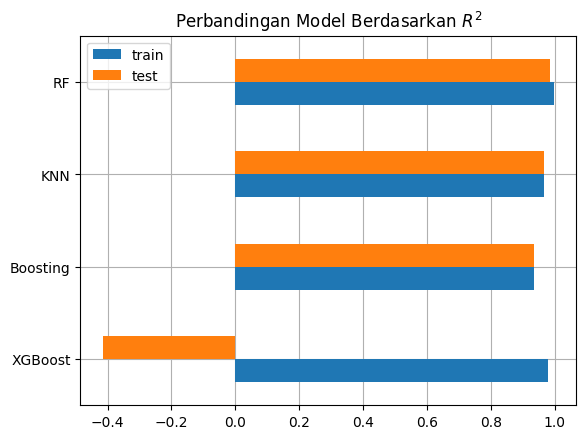

In [52]:
fig, ax = plt.subplots()
r2.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title('Perbandingan Model Berdasarkan $R^2$')

r2

,train,test
KNN,0.171605,0.175904
RF,0.031056,0.069558
Boosting,0.277855,0.277583
XGBoost,0.146967,0.502879


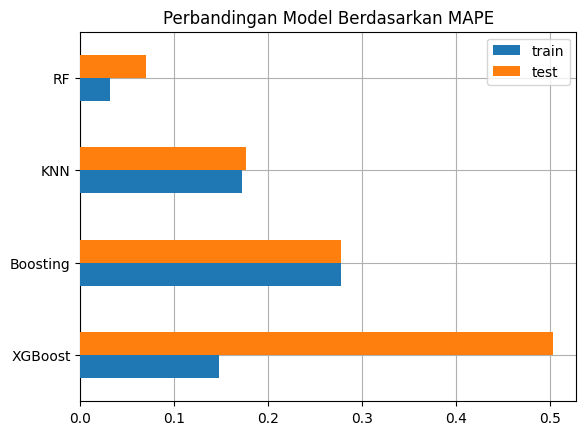

In [53]:
fig, ax = plt.subplots()
mape.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title('Perbandingan Model Berdasarkan MAPE')

mape

Dari ketiga metrik yang telah dihitung, algoritma *random forest* menunjukan hasil yang lebih baik dibandingkan tiga algoritma lainnya. Untuk memastikan, dapat dibandingkan hasil prediksi keempat model pada salah satu data uji.

In [56]:
prediksi = X_test.iloc[3:4].copy()
pred_dict = {'y_true':y_test[3:4]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_XGBoost
260322,60396,49437.1,60396.0,58752.7,5216.0


Dari uji coba prediksi ini, dapat disimpulkan bahwa hasil prediksi dari algoritma *random forest* adalah prediksi yang paling mendekati nilai sebenarnya.